In [67]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Data Augmentation using Keras and Tensorflow

In [7]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
generated_data=ImageDataGenerator(
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

In [10]:
img=load_img('C:\\Users\\Mahnoor Saeed\\Deed_learning\\cat_dogs\\cat_img\\cat.jpg')

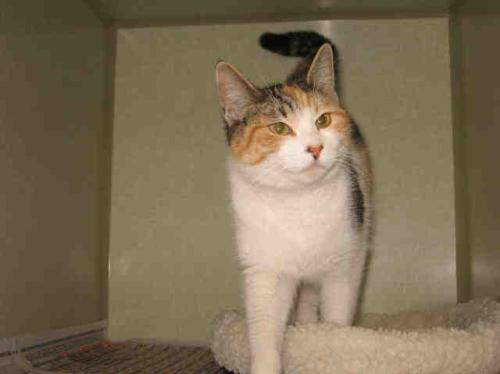

In [11]:
img

In [12]:
x=img_to_array(img)

In [15]:
x.max()

255.0

In [16]:
x.shape

(374, 500, 3)

In [18]:
x=x.reshape((1,)+x.shape)

In [20]:
x.shape

(1, 374, 500, 3)

In [24]:
#The flow command genertaes batches of randomly transformed images and save the result to directory
i=0
for batch in generated_data.flow(x,batch_size=1,save_to_dir='gen_img',
                                        save_prefix='gen_',
                                        save_format='jpg'):
    i+=1
    if i>20:
        break

## Training and Convolution Model Training

In [27]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_img,train_labels),(x_test_img,test_labels)=fashion_mnist.load_data()

In [28]:
x_train_img

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [29]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
x_train_img.mean()

72.94035223214286

In [33]:
x_train_img=x_train_img/255.0
x_test_img=x_test_img/255.0

In [34]:
x_train_img

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [36]:
x_train_img[0].shape

(28, 28)

In [37]:
x_train_img=x_train_img.reshape(len(x_train_img),28,28,1)
x_test_img=x_test_img.reshape(len(x_test_img),28,28,1)

In [38]:
x_train_img[0].shape

(28, 28, 1)

In [40]:
print(len(x_train_img))
print(len(x_train_img[0]))

60000
28


In [45]:
train_df=pd.DataFrame(train_labels,columns=['labels'])

In [50]:
train_df.value_counts()

labels
9         6000
8         6000
7         6000
6         6000
5         6000
4         6000
3         6000
2         6000
1         6000
0         6000
dtype: int64

In [81]:
def search_model(hp):
    model_initializer=keras.Sequential([
        keras.layers.Conv2D(filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
                           kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
                           activation='relu',
                           input_shape=(28,28,1)),
        keras.layers.Conv2D(filters=hp.Int('conv_2_filter',min_value=32,max_value=64,step=16),
                           kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
                           activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16),
                          activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ])
    model_initializer.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])
    return model_initializer

In [82]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [83]:
tuner_finding=RandomSearch(search_model,
                          objective='val_accuracy',
                          max_trials=5,
                          directory='output',
                           project_name='Mnist Fashion')

INFO:tensorflow:Reloading Oracle from existing project output\Mnist Fashion\oracle.json


In [84]:
tuner_finding.search(x_train_img,train_labels,epochs=3,validation_split=0.1)

Trial 6 Complete [00h 06m 31s]
val_accuracy: 0.9131666421890259

Best val_accuracy So Far: 0.9131666421890259
Total elapsed time: 00h 29m 57s
INFO:tensorflow:Oracle triggered exit


In [85]:
model=tuner_finding.get_best_models(num_models=1)[0]

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 48)        1248      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        76864     
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 80)                2048080   
                                                                 
 dense_1 (Dense)             (None, 10)                810       
                                                                 
Total params: 2,127,002
Trainable params: 2,127,002
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(x_train_img, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 112s 66ms/step - loss: 0.1672 - accuracy: 0.9366 - val_loss: 0.2539 - val_accuracy: 0.9113
Epoch 5/10
1688/1688 [==============================] - 113s 67ms/step - loss: 0.1316 - accuracy: 0.9509 - val_loss: 0.2973 - val_accuracy: 0.9033
Epoch 6/10
1688/1688 [==============================] - 118s 70ms/step - loss: 0.1034 - accuracy: 0.9614 - val_loss: 0.2930 - val_accuracy: 0.9068
Epoch 7/10
1688/1688 [==============================] - 120s 71ms/step - loss: 0.0794 - accuracy: 0.9701 - val_loss: 0.3384 - val_accuracy: 0.9103
Epoch 8/10
1688/1688 [==============================] - 124s 73ms/step - loss: 0.0624 - accuracy: 0.9767 - val_loss: 0.3344 - val_accuracy: 0.9133
Epoch 9/10
1688/1688 [==============================] - 128s 76ms/step - loss: 0.0510 - accuracy: 0.9816 - val_loss: 0.4330 - val_accuracy: 0.9083
Epoch 10/10
1688/1688 [==============================] - 130s 77ms/step - loss: 0.0377 - accuracy: 0.9865 - val_loss: 